# Machine Learning

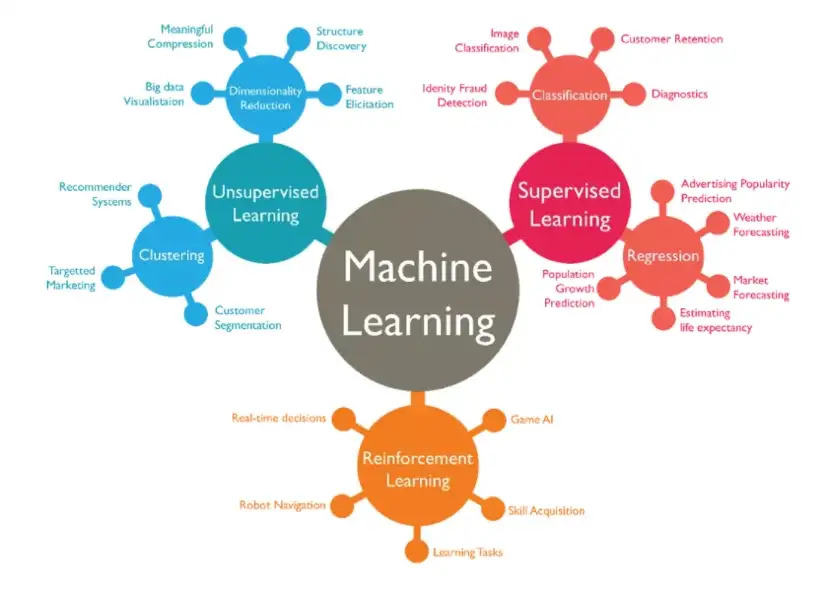

In [10]:
from PIL import Image
types_of_ML=Image.open('ML_Image/types.jpg')
types_of_ML

# Supervised Learning

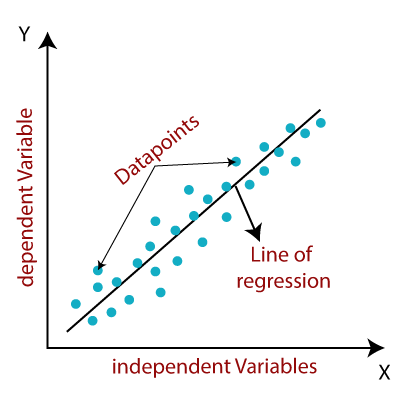

In [2]:
from PIL import Image
linear_reg=Image.open('ML_Image/linear_regression.png')
linear_reg

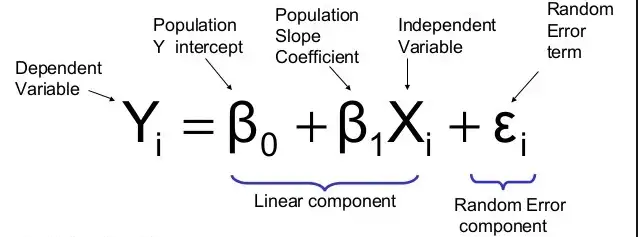

In [3]:
#Mathematical representation of linear regression
mf=Image.open('ML_Image/LinearRegression.webp')
mf

# Model_01

Make a linear regression model which can predict the salary over experience.

Step--1: Observe the data and Data Preprocessing.

In [22]:
import pandas as pd
salary_dataframe=pd.read_csv('ML_DataSet/Salary_Data.csv')
salary_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [23]:
# We can observe the mean median and quartile range over numerical data.
salary_dataframe.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [24]:
salary_dataframe.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

<AxesSubplot:>

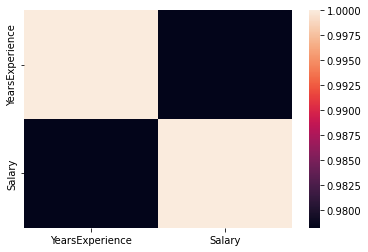

In [25]:
import seaborn as sns
sns.heatmap(salary_dataframe.corr())

Step--2: Split the dataset into training and test data.

In [36]:
from sklearn.model_selection import train_test_split
x=salary_dataframe[['YearsExperience']]
y=salary_dataframe[['Salary']]
#tuple unpacking for train and test data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
Y_train,Y_test

(      Salary
 22  101302.0
 5    56642.0
 16   66029.0
 8    64445.0
 14   61111.0
 23  113812.0
 20   91738.0
 1    46205.0
 29  121872.0
 6    60150.0
 4    39891.0
 18   81363.0
 19   93940.0
 9    57189.0
 7    54445.0
 25  105582.0
 3    43525.0
 0    39343.0
 21   98273.0
 15   67938.0
 12   56957.0,
       Salary
 2    37731.0
 28  122391.0
 13   57081.0
 10   63218.0
 26  116969.0
 24  109431.0
 27  112635.0
 11   55794.0
 17   83088.0)

In [40]:
type(Y_train)

pandas.core.frame.DataFrame

Step-3: Fitting the Simple Linear Regression to the Training Set.

In [39]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Step: 4. Prediction of test set result.

In [41]:
#Prediction of Test and Training set result
Y_pred=regressor.predict(X_test)
X_pred=regressor.predict(X_train)

In [57]:
X_pred

array([[100723.45550213],
       [ 53922.14907116],
       [ 74514.72390079],
       [ 56730.22745702],
       [ 68898.56712907],
       [103531.53388799],
       [ 90427.16808731],
       [ 38945.73101325],
       [125060.13484623],
       [ 54858.17519978],
       [ 47369.96617082],
       [ 82002.93292974],
       [ 82938.95905836],
       [ 61410.35810011],
       [ 56730.22745702],
       [111019.74291694],
       [ 45497.91391358],
       [ 37073.67875601],
       [ 93235.24647317],
       [ 72642.67164355],
       [ 64218.43648597]])

Step: 5. visualizing the Training set results.

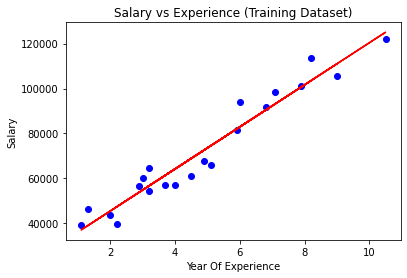

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,X_pred,color='Red')

plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

Step: 6. visualizing the Test set results.

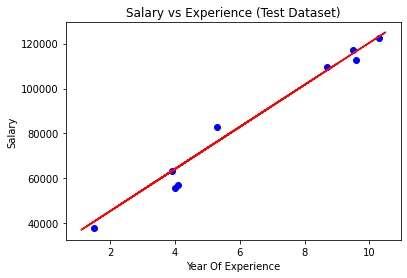

In [50]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_train,X_pred,color='Red')

plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

# Model 02 Ecommerce data

Question:
    As you are a data scientist to organization ABC. The company has given you the data of different customers collected
    over their apps and website. So as per your role you need to make some linear model which would able to predict the
    attribute where company can focus to increase yearly amount spent by User.

In [1]:
import pandas as pd
customers_df=pd.read_csv('ML_DataSet/Ecommerce_Customers.csv')
customers_df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [2]:
# checking if any dataframe contains null value or not
missing_data = customers_df.isnull()
for columns in missing_data.columns.values.tolist():
    print(columns)
    print(missing_data[columns].value_counts())
    print("")

Email
False    500
Name: Email, dtype: int64

Address
False    500
Name: Address, dtype: int64

Avatar
False    500
Name: Avatar, dtype: int64

Avg. Session Length
False    500
Name: Avg. Session Length, dtype: int64

Time on App
False    500
Name: Time on App, dtype: int64

Time on Website
False    500
Name: Time on Website, dtype: int64

Length of Membership
False    500
Name: Length of Membership, dtype: int64

Yearly Amount Spent
False    500
Name: Yearly Amount Spent, dtype: int64



In [3]:
customers_df[customers_df.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Email, Address, Avatar, Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent]
Index: []

<AxesSubplot:>

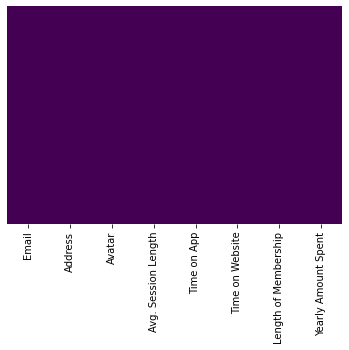

In [4]:
import seaborn as sns
sns.heatmap(customers_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

Note: Above analysis shows that there is no missing values with any columns.

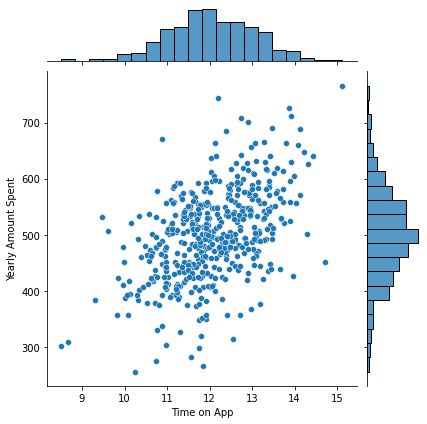

In [10]:
# see the relation between amount spent and time spent on App.
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(data=customers_df,x='Time on App',y='Yearly Amount Spent')
plt.show()

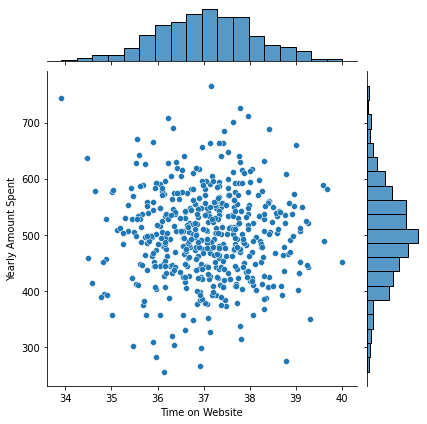

In [11]:
#See the relation between amount spent and time spent on website
sns.jointplot(data=customers_df,x='Time on Website',y='Yearly Amount Spent')
plt.show()

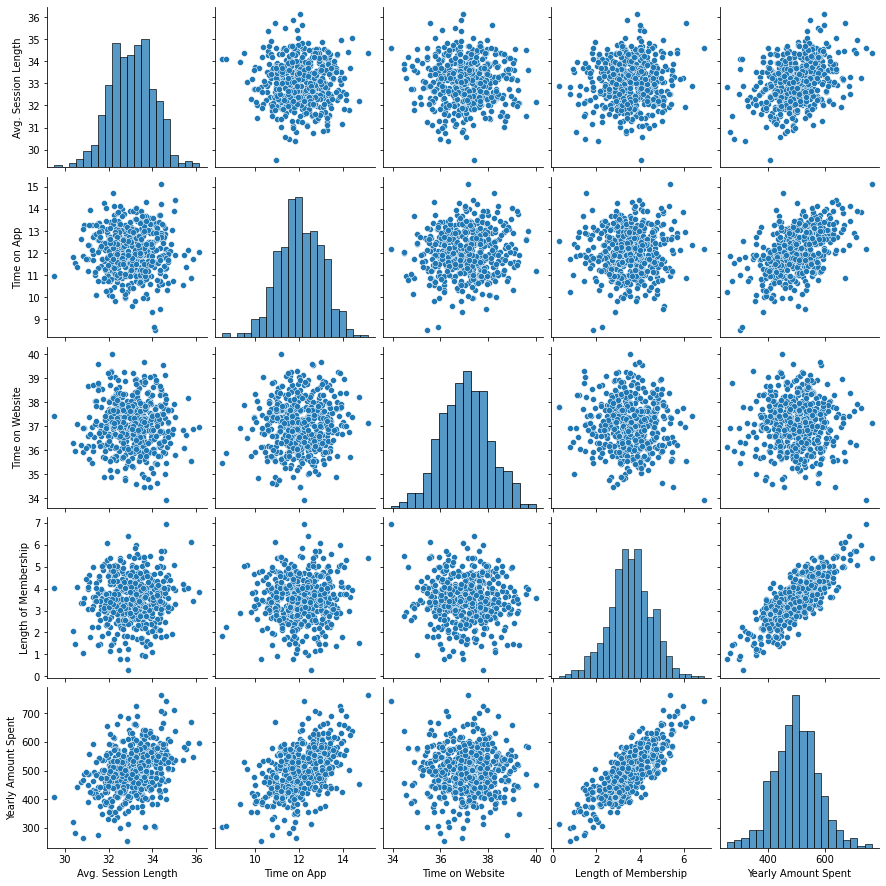

In [12]:
sns.pairplot(customers_df)
plt.show()

Note: From the above pair-plot we can conclude that "Length of Membership" vs "Yearly amount spent" has best fitted linear relation.

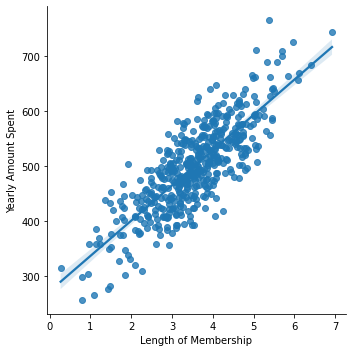

In [13]:
# Now we will create an plot between membership and amount spent column.
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(data=customers_df,x='Length of Membership',y='Yearly Amount Spent')
plt.show()

Now prepare testing and training data from dataset. Y=yearly amount spent and X=numerical column inside dataset

In [14]:
customers_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
Y=customers_df['Yearly Amount Spent']
X=customers_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [16]:
Y.dtype

dtype('float64')

In [17]:
type(X)

pandas.core.frame.DataFrame

Training the Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

Print out the coefficient of the model.

In [19]:
regressor.coef_

array([25.91225933, 38.50812563,  0.28871629, 61.16161032])

Predicting the test data.

In [20]:
prediction=regressor.predict(X_test)

Create a scatter plot between real test data and prediction.

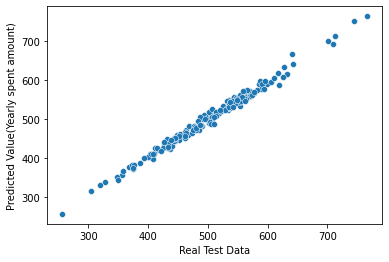

In [21]:
sns.scatterplot(x=Y_test,y=prediction)
plt.xlabel('Real Test Data')
plt.ylabel("Predicted Value(Yearly spent amount)")
plt.show()

Note: As we can visualize the relation between predicted value and real test data is almost linear with little bit of noise.

Evaluate the Model mathematically.

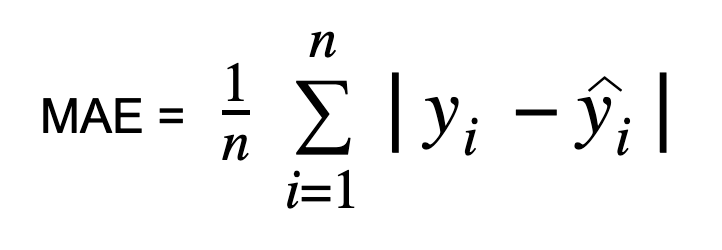

In [22]:
from PIL import Image
mae=Image.open('ML_Image/MAE.png')
mae

In [23]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(Y_test,prediction)
print(mean_abs_error)

7.294546588331326


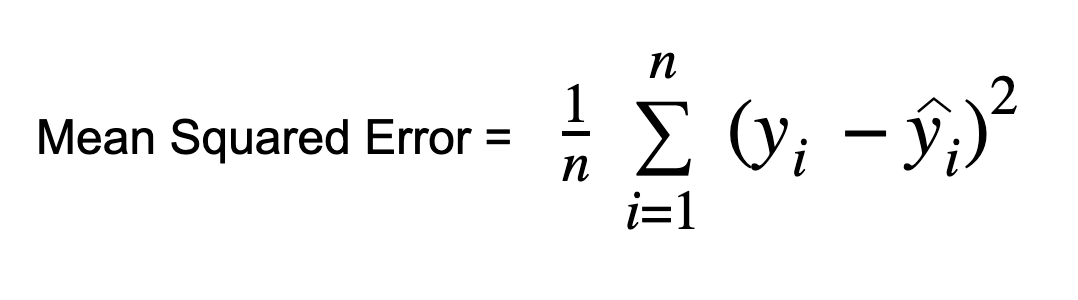

In [24]:
'''Mean Squared Error(MSE):
    Mean Squared Error represents the average of the squared difference between the original and predicted values in the
    data set. It measures the variance of the residuals.'''
mse=Image.open('ML_Image/MSE.png')
mse

In [25]:
mean_sq_error=metrics.mean_squared_error(Y_test,prediction)
print(mean_sq_error)

81.90726984520953


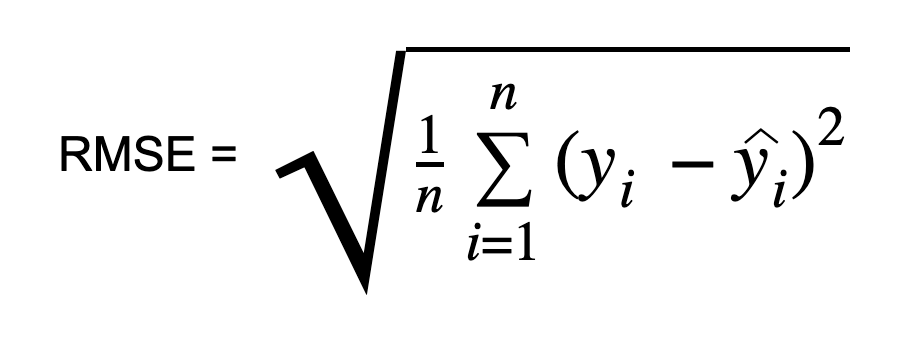

In [26]:
'''Root Mean Square Error(RMSE)
    Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.'''
rmse=Image.open('ML_Image/RMSE.png')
rmse

In [27]:
import numpy as np
root_mn_sq_error=np.sqrt(metrics.mean_squared_error(Y_test,prediction))
print(root_mn_sq_error)

9.050263523522922


In [117]:
# Below the how much variance our regression model show with actual data
print(metrics.explained_variance_score(Y_test,prediction))

0.988218935704259


    Note:Our Linear Regression model show 98% of variance that is a very good score.
        RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has
        the same units as the dependent variable (Y-axis).

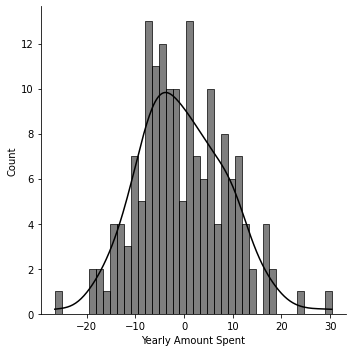

In [130]:
'''Plot a graph of residuals.
The residual for each observation is the difference between predicted values of y(dependent variable) and observed values
of y.
Residual=actual y value−predicted y value,ri=yi−^yi.'''
sns.displot((Y_test-prediction),kde=True,color='black',bins=40)
plt.show()

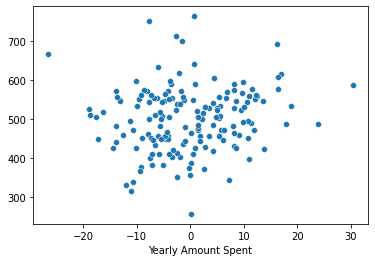

In [159]:
sns.scatterplot(x=Y_test-prediction,y=prediction)
plt.show()

Note: As we can observe from above residuals plot the deviation is approax zero. which implicated a good sign for our model.

In [133]:
cdf=pd.DataFrame(regressor.coef_,X.columns,columns=['Coeff'])
cdf

Coeff
Avg. Session Length   25.912259
Time on App           38.508126
Time on Website        0.288716
Length of Membership  61.161610

# Logistic Regression

# Linear vs Logistic

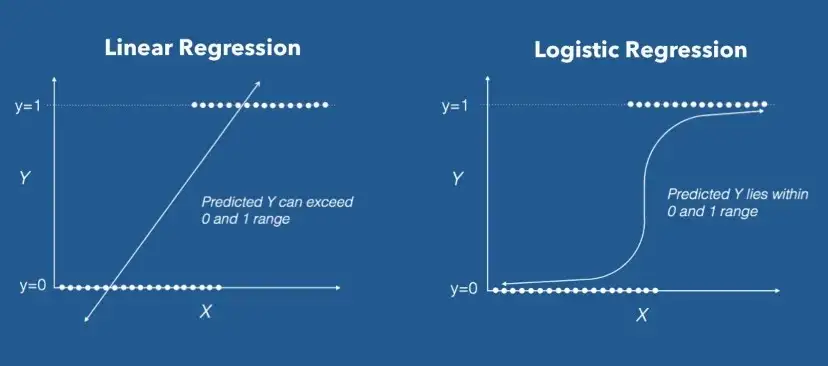

In [4]:
from PIL import Image
graph=Image.open('ML_Image/linearVSlogistc.webp')
graph

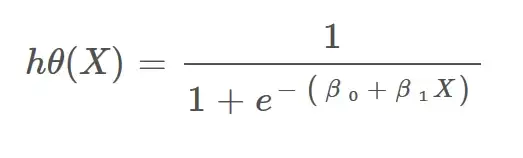

In [5]:
#Logistic regression function
#where B0+B1*X is linear function
fn=Image.open('ML_Image/logistic_cost_fn.webp')
fn

Example of Logistic regression

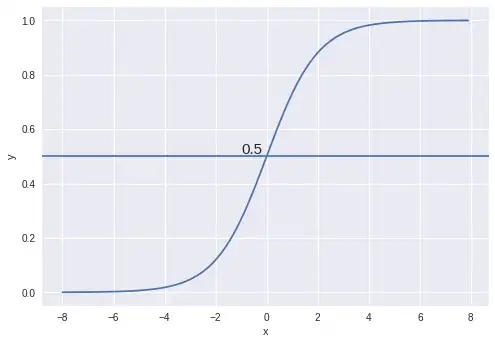

In [6]:
'''For Example, We have 2 classes, let’s take them like cats and dogs(1 — dog , 2 — cats). We basically decide with a
threshold value above which we classify values into Class 1 and of the value goes below the threshold then we classify
it in Class 2.'''
example=Image.open('ML_Image/logistic_example.webp')
example

# Logistic regression Over Titanic Dataset

Note: We divided the titanic dataset into two parts like titanic_train.csv and titanic_test.csv .

In [7]:
import pandas as pd
train=pd.read_csv('ML_DataSet/titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

As we know lots of data will be missing in dataset. so we will create a heatmap to see the missing data in corresponding columns.

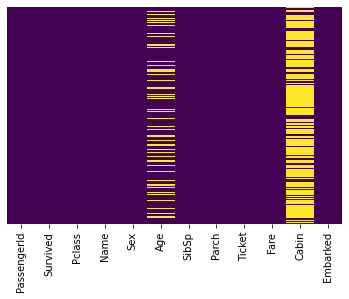

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yticklabels-- False , so that lots of ticks should not come at y-Axis, Cbar=False-- to remove side colorbar along y-axis
plt.show()

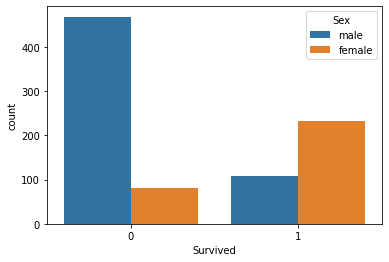

In [9]:
#Now we will observe the survived ratio on titanic.
sns.countplot(data=train,x='Survived',hue='Sex')
plt.show()

Note: Above countplot show the Survival ratio is higher for Female.

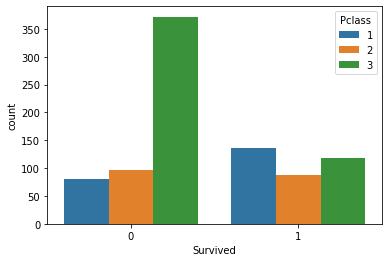

In [10]:
sns.countplot(data=train,x='Survived',hue='Pclass')
plt.show()

Note: Above plot clearly shows the survival count is greater in the passenger class-I.

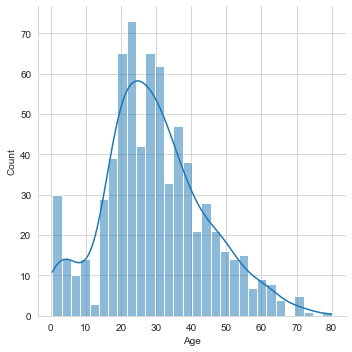

In [11]:
'''
Now we will analyze the the pasenger age distribution with help of distribution plot.
'''
sns.set_style('whitegrid')
sns.displot(data=train['Age'].dropna(),kde=True,bins=30)
plt.show()

Note: Above distribution plot says that most of the passenger between 20-30.

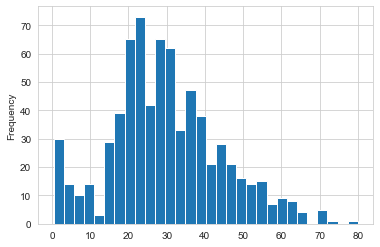

In [12]:
# we can directly plot the graph from dataframe
train['Age'].plot(kind='hist',bins=30)
plt.show()

Cleaning of train data through analysis.

In [13]:
'''
As we have seen that some of age column is missing so we need to fill with some average/mean/mode. so we will create a box
plot over different passenger class to get a clear view of mean age.
'''
plt.figure(figsize=(12,6))
sns.boxplot(data=train,x='Pclass',y='Age')
plt.show()

In [14]:
#calculate the mean age in different class of passenger.
pclass1_df=train[train['Pclass']==1][['Age','Pclass']]
pclass1_df.head()

Age  Pclass
1   38.0       1
3   35.0       1
6   54.0       1
11  58.0       1
23  28.0       1

In [15]:
mean_age_1=pclass1_df['Age']
mean_age_1.mean(skipna=True)

38.233440860215055

In [16]:
#pclass-2
pclass2_df=train[train['Pclass']==2]['Age']
pclass2_df.mean(skipna=True)

29.87763005780347

In [17]:
pclass3_df=train[train['Pclass']==3]['Age']
pclass3_df.mean(skipna=True)

25.14061971830986

Making a function which will replace the missing age information in titanic_train dataset.

In [18]:
def replace_NaN_age_with_average(col_df):
    Age=col_df[0]
    Pclass=col_df[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age
    
train['Age']=train[['Age','Pclass']].apply(replace_NaN_age_with_average,axis=1)

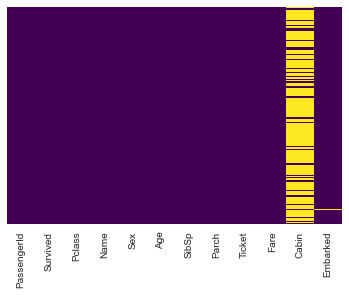

In [19]:
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Note: As we can see after applying the function to replace the missing age information. We can see there is no NULL available value in age column of heatmap.

In [20]:
#As it is obvious that there is no much relation between survival ratio to cabin info of passeneger so we will drop it.
train.drop(columns=['Cabin'],inplace=True,axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

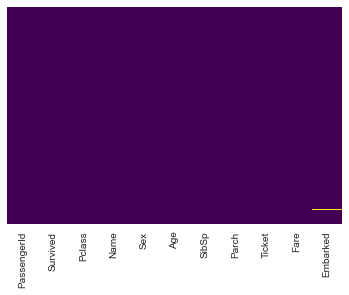

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Now we can see that no more null values in heatmap.**

In [22]:
#Dropping some unwanted column which is not necessary for our model. Like passengerId,Name,Ticket.
train.drop(columns=['PassengerId','Name','Ticket'],inplace=True,axis=1)
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [23]:
'''As we analyzed the sex column is categorical column in dataframe and it is affecting the survival ratio so we will
create some dummy column against it.'''

# Dummy column against Sex column
dummy_sex=pd.get_dummies(train['Sex'],drop_first=True)
dummy_sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [24]:
dummy_embarked=pd.get_dummies(data=train['Embarked'],drop_first=True)
dummy_embarked.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [25]:
train=pd.concat([train,dummy_sex,dummy_embarked],axis=1)
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  male  Q  S
0         0       3    male  22.0      1      0   7.2500        S     1  0  1
1         1       1  female  38.0      1      0  71.2833        C     0  0  0
2         1       3  female  26.0      0      0   7.9250        S     0  0  1
3         1       1  female  35.0      1      0  53.1000        S     0  0  1
4         0       3    male  35.0      0      0   8.0500        S     1  0  1

In [26]:
train.drop(columns=['Sex','Embarked'],inplace=True,axis=1)
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

Note: Our train data is ready for training the model but for predicting the survival we will prepare the test data.

In [27]:
from sklearn.model_selection import train_test_split
X=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [29]:
prediction=logmodel.predict(X_test)

Now Checking the accuracy of our logistic regression model over survival.

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy of Titanic survival Logistic model:",round(accuracy_score(prediction,y_test)*100,2))

Accuracy of Titanic survival Logistic model: 79.1


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [34]:
#make the confusion matrix over logistic model
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,prediction)
conf_matrix

array([[135,  19],
       [ 37,  77]], dtype=int64)

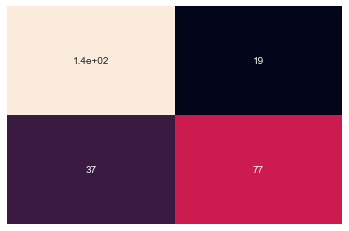

In [41]:
sns.heatmap(data=conf_matrix,annot=True,xticklabels=False,yticklabels=False,cbar=False)
plt.show()

Note: Above heatmap is of confusion matrix.

# Confusion matrix

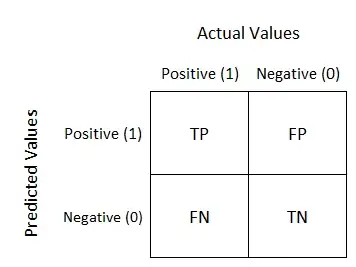

In [48]:
from PIL import Image
confusion=Image.open('ML_Image/confusion.webp')
confusion_practical=Image.open('ML_Image/confusion_practical.webp')
confusion

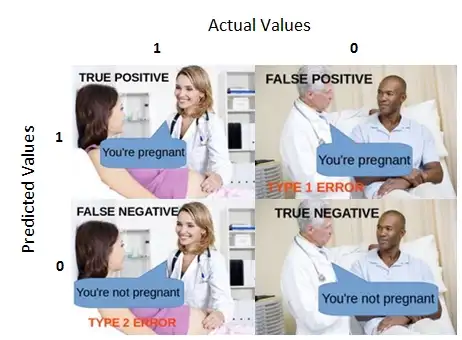

In [49]:
confusion_practical

# Classification Report

**Precision — What percent of your predictions were correct?**

**Recall — What percent of the positive cases did you catch?**

**F1 score — What percent of positive predictions were correct?**

**Support**

# Logistic model over Advertising csv

In [30]:
import pandas as pd
advertise=pd.read_csv('ML_DataSet/advertising.csv')
advertise.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [31]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:>

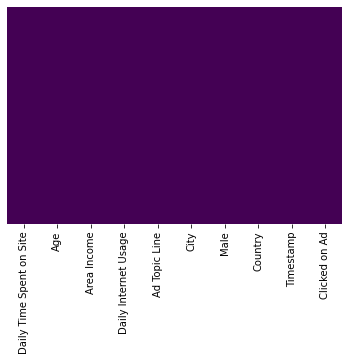

In [32]:
import seaborn as sns
sns.heatmap(data=advertise.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Note: As we can see there is no any NAN or missing value in our dataset. So now we need to think about relationship betwween Dependent and Independent attribute.

In [36]:
from sklearn.model_selection import train_test_split
X=advertise[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y=advertise['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report:\n",classification_report(y_test,pred),end='\n\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


Confusion Matrix:
 [[149   8]
 [ 14 129]]


In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy of our model:",round(accuracy_score(y_test,pred)*100,2))

Accuracy of our model: 92.67


**As we can see that our model score is good enough to explain the trend of clicking on ad.**

# KNN-Algorithm

We often judge people by their vicinity to the group of people they live with. People who belong to a particular
group are usually considered similar based on the characteristics they possess. This is the simple principle on which
the KNN algorithm works — “Birds of the same feather flock together.”

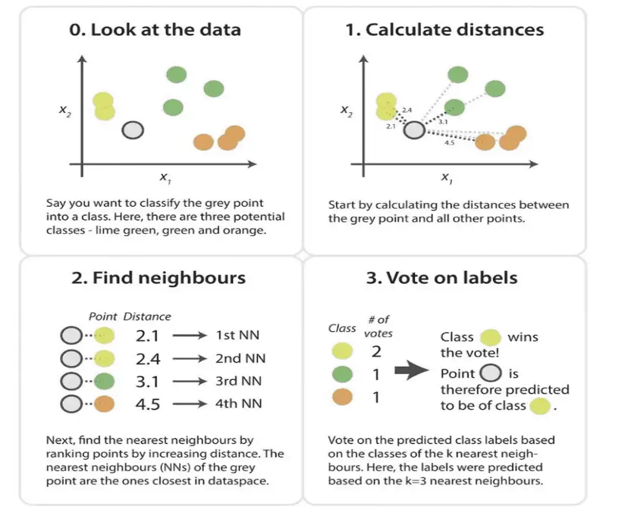

In [9]:
# lets try to understand KNN with example:
from PIL import Image
knn=Image.open('ML_Image/KNN.webp')
knn=knn.resize((628,507))
knn

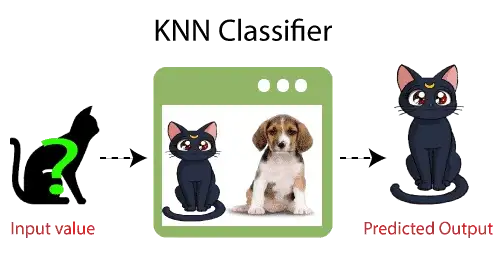

In [10]:
'''
Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog.
So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the
similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in
either cat or dog category.
'''
classifier=Image.open('ML_Image/KNN_classifier.webp')
classifier

**More Examples**

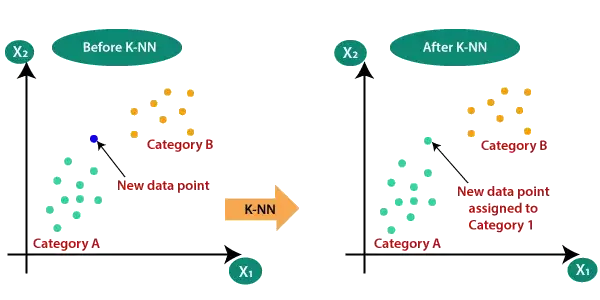

In [12]:
'''
Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1,
so this data point will lie in which of these categories. To solve this type of problem, we need a
K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular
dataset. Consider the below diagram:
'''
knn_example=Image.open("ML_Image/KNN_example.webp")
knn_example

**How to choose a K value?**

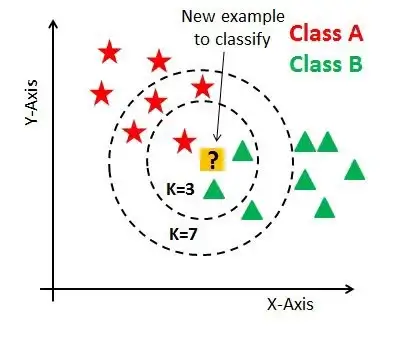

In [13]:
# Be remember K-Value plays an important role for prediction metrics.
kvalue=Image.open('ML_Image/KNN_kValue.webp')
kvalue

**Distance Calculation Algorithm**

In [18]:
distance=Image.open('ML_Image/distance.webp')
distance2=Image.open('ML_Image/hamming_distance.webp')

Euclidian and Manhattan Distance:


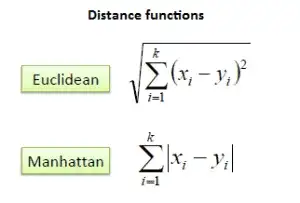

In [22]:
print('Euclidian and Manhattan Distance:')
distance

Hamming Distance:


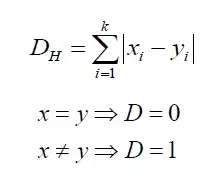

In [23]:
print('Hamming Distance:')
distance2

# ML Model with KNN

In [6]:
import pandas as pd
d=pd.read_csv('ML_DataSet/Classified Data.txt')
d.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [7]:
import pandas as pd
df=pd.read_csv('ML_DataSet/Classified Data.txt',index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

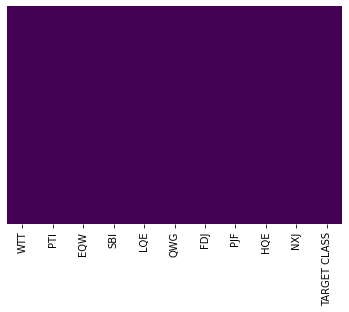

In [8]:
# check if any NULL column exist or not
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Standarize the Variables**

In [10]:
from sklearn.preprocessing import StandardScaler
#object creation for standard scaler
scaler=StandardScaler()
# Fit the scaler to the features
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [18]:
scaled_feature[:2]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862]])

**Convert scaled feature to Dataframe to work with it.**

In [20]:
df_feat=pd.DataFrame(data=scaled_feature,columns=df.columns[:-1]) # to remove the last column 'Target Class' we used [:-1]
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

**Tain Test split of data.**

In [56]:
from sklearn.model_selection import train_test_split
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Using KNN Classifier**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) # KNN Model instance with K=5 neighbours
knn.fit(X_train,y_train)  # fit KNN with training data

KNeighborsClassifier()

**Prediction and Evaluation.**

In [58]:
prediction=knn.predict(X_test)

In [59]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction),end='\n\n')
print("Clasification report:\n",classification_report(y_test,prediction))

Confusion Matrix:
 [[154   5]
 [ 12 129]]

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Checking accuracy of models.**

In [61]:
from sklearn.metrics import accuracy_score
print('The accuracy of our model:',round(accuracy_score(y_test,prediction)*100,2))

The accuracy of our model: 94.33


**Choose the appropriate K value.**

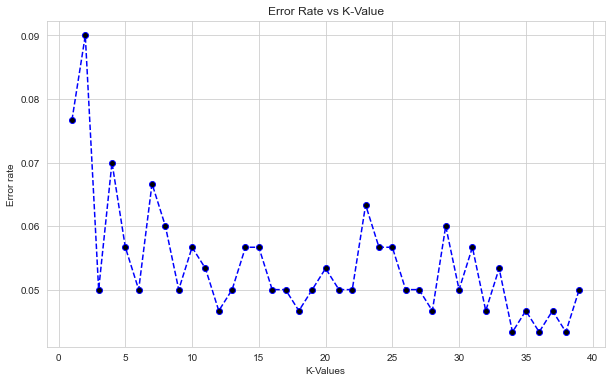

In [70]:
import numpy as np
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='black')
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Values')
plt.ylabel('Error rate')
plt.show()

**Conclusion**

Above plot shows that the Optimal value of K should be 30-35 for best approximation.

In [71]:
# Making the model again for k=34
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
final_prediction=knn.predict(X_test)
print('With Optimal value K=34 details as below:\n\n')
print('Classification Report:\n',classification_report(y_test,final_prediction))
print('Confusion Matrics:\n',confusion_matrix(y_test,final_prediction))
print('Model Accuracy:\n',round(accuracy_score(y_test,final_prediction)*100,2))

With Optimal value K=34 details as below:


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrics:
 [[153   6]
 [  7 134]]
Model Accuracy:
 95.67


**As we can see our result have best score at K=34 with most accuracy score. Also confusion metrics is better than previous.**

**Q. Why KNN is called Lazy Learning Algorithm??**

# Project Model Using KNN

In [73]:
import pandas as pd
knn_data=pd.read_csv('ML_DataSet/KNN_Project_Data.txt')
knn_data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [79]:
knn_data['TARGET CLASS'].unique()

array([0, 1], dtype=int64)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(knn_data.drop('TARGET CLASS',axis=1))

In [82]:
scaled_data[:2]

array([[ 1.56852168, -0.44343461,  1.61980773, -0.9582548 , -1.12848137,
         0.13833575,  0.98049313, -0.93279392,  1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , -1.50422015,  0.64000936,
         1.08155221, -1.18266332, -0.46186435,  0.25832069, -1.04154625]])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, knn_data['TARGET CLASS'], test_size=0.3, random_state=101)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=5)
k.fit(X_train,y_train)
class_prediction=k.predict(X_test)
class_prediction

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], d

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Confusion Matrix:\n',confusion_matrix(y_test,class_prediction))
print('Accuracy Score:',accuracy_score(y_test,class_prediction))

Confusion Matrix:
 [[122  30]
 [ 32 116]]
Accuracy Score: 0.7933333333333333


**Choosing K value with Elbow method**

In [87]:
import numpy as np
error=[]
for i in range(1,40):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    pred_i=k.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

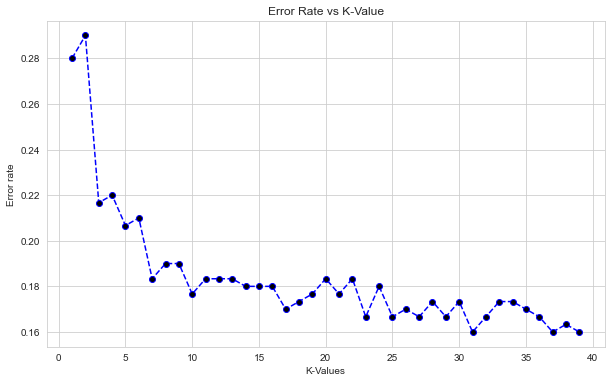

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plt.plot(range(1,40),error,color='blue',linestyle='--',marker='o',markerfacecolor='black')
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Values')
plt.ylabel('Error rate')
plt.show()

**Now retrain model with appropriate k=30.**

In [95]:
retrained_knn=KNeighborsClassifier(n_neighbors=30)
retrained_knn.fit(X_train,y_train)
re_prediction=k.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(y_test,re_prediction))
print('Accuracy Score:',accuracy_score(y_test,re_prediction))

Confusion Matrix:
 [[125  27]
 [ 21 127]]
Accuracy Score: 0.84


**Good Job, Keep continue.**

# Decesion Tree Algorithm

**We have couple of other algorithms there, so why do we have to choose Decision trees?**

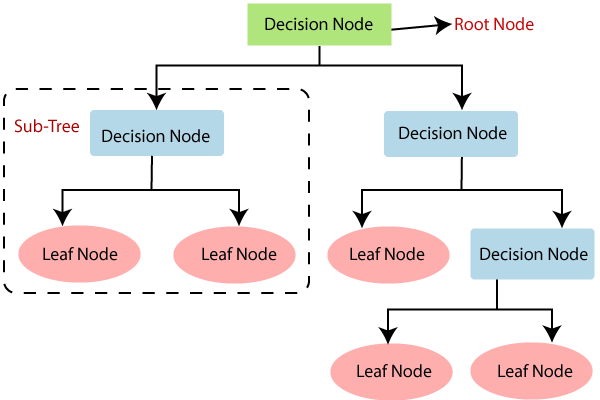

In [97]:
from PIL import Image
tree=Image.open('ML_Image/decision_tree1.png')
tree

**Okay so how to build this?**

**Classification with using the ID3 algorithm.**

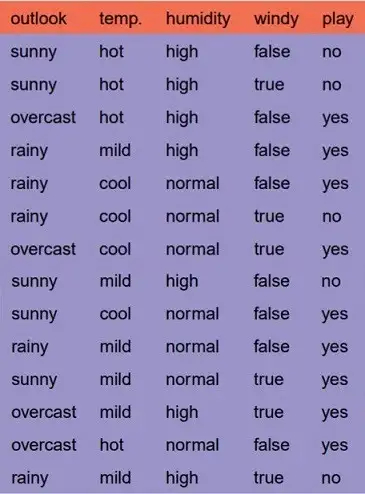

In [99]:
'''
Let’s just take a famous dataset in the machine learning world which is weather dataset(playing game Y or N based on
weather condition).
'''
from PIL import Image
dataset=Image.open('ML_Image/weather_play.webp')
dataset

**So which one do we need to pick first for root NODE?**

In [104]:
from PIL import Image
entropy_formula=Image.open('ML_Image/entropy.webp').resize((828,300))
entropy_formula

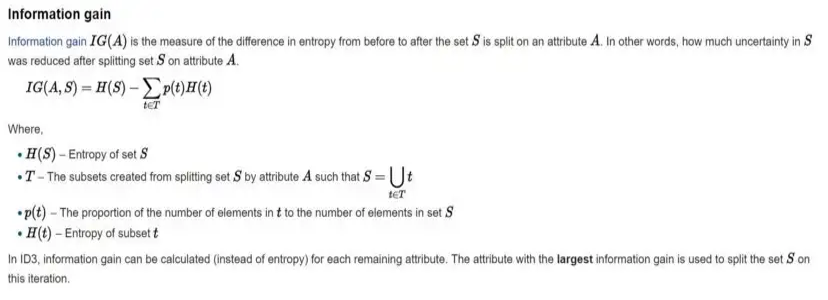

In [107]:
information_gain_formula=Image.open('ML_Image/Information_gain.webp').resize((828,300))
information_gain_formula

**Okay lets apply these metrics to our dataset to split the data(getting the root node)**

**Compute the entropy for the weather data set:**

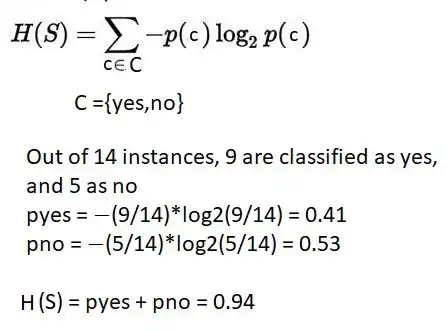

In [108]:
from PIL import Image
wheather_entropy=Image.open('ML_Image/wheather_entropy.webp')
wheather_entropy

**For every feature calculate the entropy and information gain.**

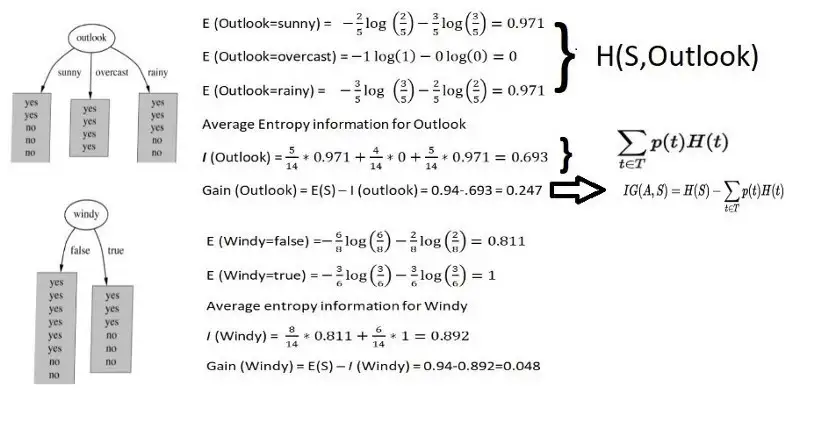

In [109]:
information_gain_per_attribute=Image.open('ML_Image/Information_gain_calculation.webp')
information_gain_per_attribute

**Similarity we can calculate for other two attributes(Humidity and Temp).**

**Pick the highest gain attribute.**

In [110]:
root_node=Image.open('ML_Image/root_node_selection.webp')
root_node

**From Above description we can conclude that Outlook is our root NODE.**

**Our Descision Tree Looks like as below.**

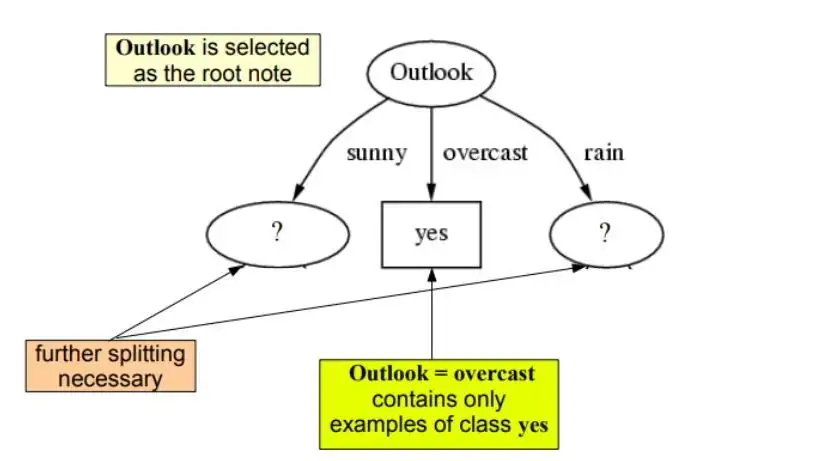

In [111]:
semi_tree=Image.open('ML_Image/semi_desc_tree.webp')
semi_tree

**Repeat the same thing for sub-trees till we get the tree.**

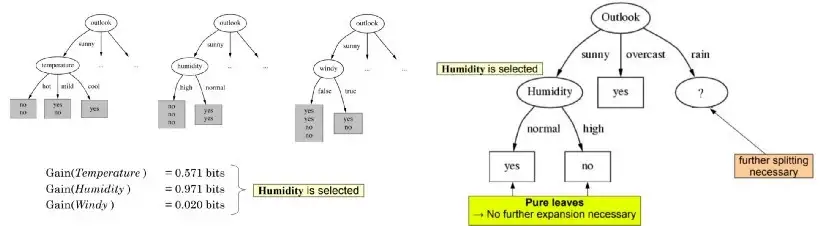

In [112]:
pic1=Image.open('ML_Image/medium_desc_tree.webp')
pic1

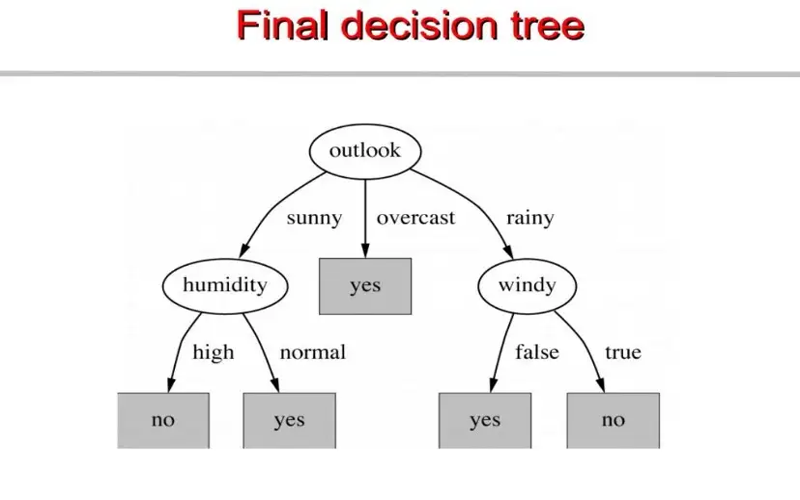

In [116]:
final_tree=Image.open('ML_Image/final_desc_tree.webp').resize((800,500))
final_tree

# ML Model using Descision Tree Algorithm.

In [117]:
import pandas as pd
user_data=pd.read_csv('ML_DataSet/User_Data.csv')
user_data.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

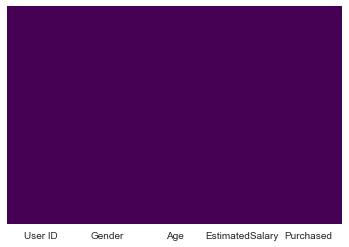

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(user_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(user_data.drop(columns=['User ID','Purchased','Gender'],axis=1))

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_feature, user_data['Purchased'], test_size=0.33, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=101)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [130]:
purchase_predict=tree.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,purchase_predict))

[[71  9]
 [ 9 43]]


In [133]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,purchase_predict)*100,2))

86.36


# Random Forest Algorithm

As we know to draw a **DESCISION TREE** over a dataset with respect to attributes. Now in random forest we will grow a forest of descision trees. Then we will classify the data points with every descision tree and datapoint will be classified in most favourable class.

**For Example**

    Suppose we have 10 descision trees according to **Random Forest Algorithm** and outcome classes are **Class A, Class B     and Class C**. Now take a datapoint and according to different **Descision Tree** available we get classification like     as-- 5 out of 10 descision tree favours the class B, 3 out of 10 descision tree favours in class C and remaining 2     specify in class A. So most of the votes supports for class B classification.

**How random forests work?**

**The out-of-bag (oob) error estimate.**

**Question: We will take a dataset and we will make model based on Descision tree and Random Forest algorithm and compare the result also.**

**1.Descision Tree over Kyphosis DataSet.**

In [138]:
import pandas as pd
kyphosis=pd.read_csv('ML_DataSet/kyphosis.csv')
kyphosis.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [139]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


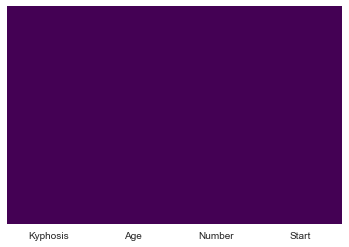

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(kyphosis.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

**NOTE: Above plot show there is no any null value present in dataset.**

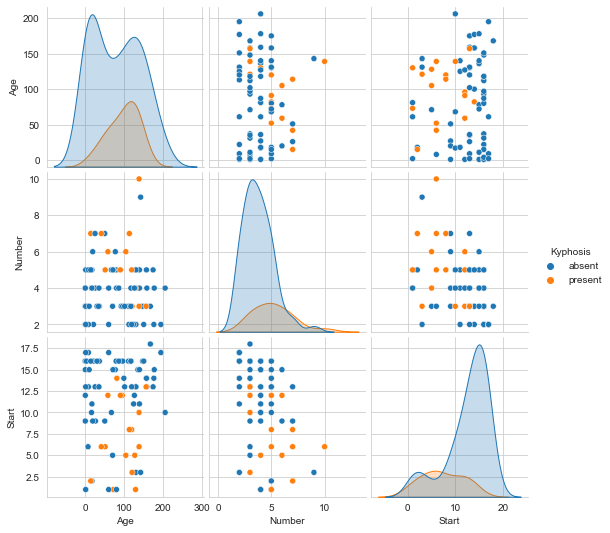

In [141]:
#Draw the pairplot of above data to see a clear picture of it as dataset is small.
sns.pairplot(data=kyphosis,hue='Kyphosis')
plt.show()

In [143]:
from sklearn.model_selection import train_test_split
X=kyphosis.drop('Kyphosis',axis=1)
y=kyphosis['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [144]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(criterion='entropy',random_state=101)
d.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [145]:
from sklearn.metrics import confusion_matrix,classification_report
kyphosis_predict=d.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(kyphosis_predict,y_test))
print()
print('Classification report:\n',classification_report(kyphosis_predict,y_test))

Confusion Matrix:
 [[17  3]
 [ 0  5]]

Classification report:
               precision    recall  f1-score   support

      absent       1.00      0.85      0.92        20
     present       0.62      1.00      0.77         5

    accuracy                           0.88        25
   macro avg       0.81      0.93      0.84        25
weighted avg       0.93      0.88      0.89        25



In [146]:
from sklearn.metrics import accuracy_score
print("Our descision tree acuuracy:",round(accuracy_score(kyphosis_predict,y_test)*100,2))

Our descision tree acuuracy: 88.0


**2.Random Forest over Kyphosis Dataset.**

In [164]:
#As our data is already splitted in train test split so we will directly use our data in random forest.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
from sklearn.metrics import confusion_matrix,classification_report
rfc_predict=rfc.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(rfc_predict,y_test))
print()
print('Classification report:\n',classification_report(rfc_predict,y_test))

Confusion Matrix:
 [[17  6]
 [ 0  2]]

Classification report:
               precision    recall  f1-score   support

      absent       1.00      0.74      0.85        23
     present       0.25      1.00      0.40         2

    accuracy                           0.76        25
   macro avg       0.62      0.87      0.62        25
weighted avg       0.94      0.76      0.81        25



In [166]:
from sklearn.metrics import accuracy_score
print("Our descision tree acuuracy:",round(accuracy_score(rfc_predict,y_test)*100,2))

Our descision tree acuuracy: 76.0


# Good Job

**Q. Take the loan data and make the ML Models with help of Descision Tree and Random Forest algorithm.**

In [167]:
import pandas as pd
loan=pd.read_csv('ML_DataSet/Loan_data.txt')
loan.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [169]:
cat_feat=['purpose']
final_data=pd.get_dummies(data=loan,columns=cat_feat,drop_first=True)
final_data.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [170]:
from sklearn.model_selection import train_test_split
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=101)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [172]:
from sklearn.metrics import classification_report,confusion_matrix
loan_prediction=dtree.predict(X_test)
print('Classification report:\n',classification_report(loan_prediction,y_test))
print('Confusion Matrix:\n',confusion_matrix(loan_prediction,y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      2369
           1       0.21      0.18      0.19       505

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.72      0.73      0.73      2874

Confusion Matrix:
 [[2017  352]
 [ 414   91]]


In [173]:
from sklearn.metrics import accuracy_score
print('Accuracy of Loan Data over descision Tree:',round(accuracy_score(loan_prediction,y_test)*100,2))

Accuracy of Loan Data over descision Tree: 73.35


**Random Forest for Loan Data**

In [174]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
result_prediction=random_forest.predict(X_test)

In [177]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification Report:\n',classification_report(result_prediction,y_test))
print('Confusion Matrix:\n',confusion_matrix(result_prediction,y_test))
print()
print('Accuracy for loan over Random forest:',round(accuracy_score(result_prediction,y_test)*100,2))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      2848
           1       0.02      0.42      0.05        26

    accuracy                           0.84      2874
   macro avg       0.51      0.64      0.48      2874
weighted avg       0.99      0.84      0.91      2874

Confusion Matrix:
 [[2416  432]
 [  15   11]]

Accuracy for loan over Random forest: 84.45


**Which Model is better over Loan Dataset??**

Ans: Compare the Classification Report and accuracy of models in both cases.

    1. if we compare the classification report over class-0 then it is obvious that Random Forest algo performance better.
    
    2. for Class-1 normal Descision tree performs better score except f1-score value. Greater f1-score value is good for model.
    
Note:So to acceptance of model should also depends on business insight.But if we accept the model according to accuracy then random Forest is better for above one.

# Support Vector Machine

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification
as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [2]:
from PIL import Image
svm=Image.open('ML_Image/SVM.png')
svm

**Support vector machine example.**

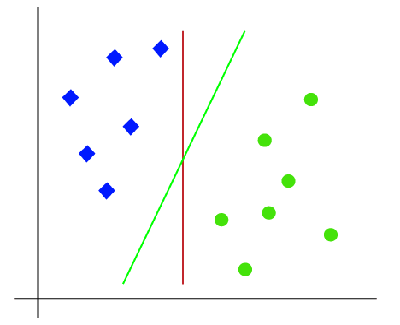

In [6]:
svm1=Image.open('ML_Image/svm_example1.png')
svm1=svm1.resize((400,325))
svm1

**Question: Which line best describe the boundry.**

SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as margin.

And the goal of SVM is to maximize this margin.Below image about optimal hyperplane.

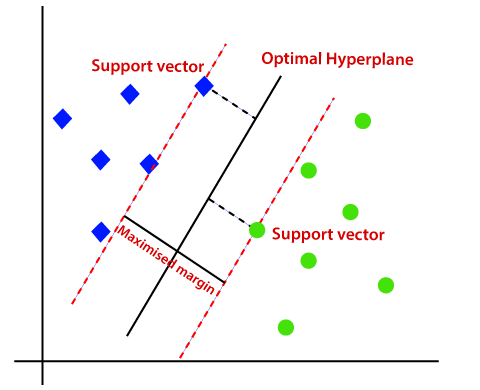

In [7]:
svm2=Image.open('ML_Image/svm_lin_hyperplane.png')
svm2

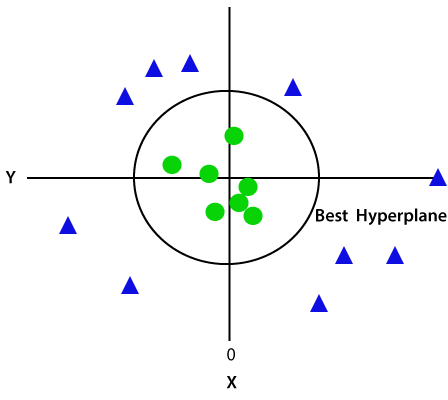

In [8]:
svm3=Image.open('ML_Image/svm_non_linear.png')
svm3

**Note:** In Above example we can see that linear classification not possible w=so we made a circular plane along z-axis as
    z=x^2 +y^2. Imagine a 3D situation here.

**Making it a little more complex.**

What if data plot overlaps? Or, what in case some of the black points are inside the blue ones? Which line among 1 or 2?should we draw?

In [9]:
from PIL import Image
img1=Image.open('ML_Image/svm_outliers.webp')
img2=Image.open('ML_Image/svm_tuned_plane.webp')

In [10]:
img1

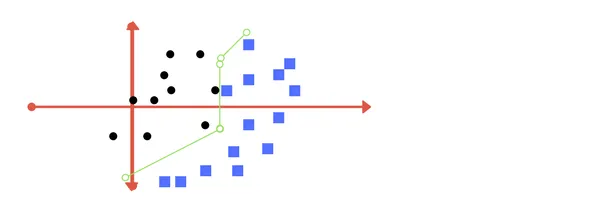

In [11]:
img2

**Tuning parameters: Kernel, Regularization, Gamma and Margin.**

**Kernel**

**Regularization**

**Gamma**

**High Gamma vs Low Gamma**

In [13]:
from PIL import Image
low_gamma=Image.open('ML_Image/svm_low_gamma.webp')
high_gamma=Image.open('ML_Image/svm_high_gamma.webp')

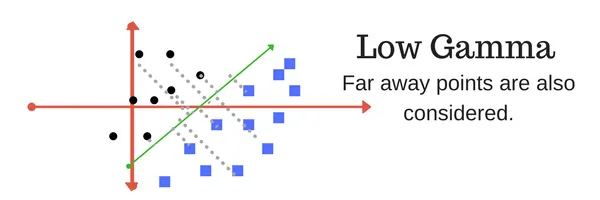

In [14]:
low_gamma

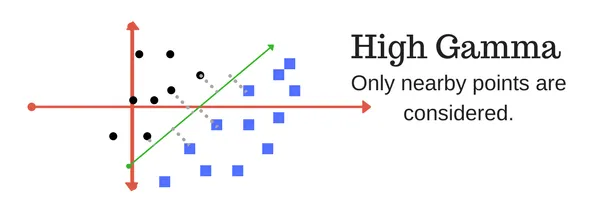

In [15]:
high_gamma

**Margin**

# SVM with Python

Question: We have dataset over breast tumor. We will use SVM classification Algorithm to categorize that one particular
    have brest tumor or not.

In [21]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
#print(cancer['DESCR'])

**Making dataframe from cancer data**

In [24]:
import pandas as pd
cancer_df=pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [32]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
from sklearn.model_selection import train_test_split
X=cancer_df
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [36]:
tumor_prediction=model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Classification Report:\n',classification_report(tumor_prediction,y_test))
print()
print('confusion Matrix:\n',confusion_matrix(tumor_prediction,y_test))
print()
print('SVM Model accuracy:',accuracy_score(y_test,tumor_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        59
           1       0.97      0.91      0.94       112

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171


confusion Matrix:
 [[ 56   3]
 [ 10 102]]

SVM Model accuracy: 0.9239766081871345


**Hyperparameter Tuning with GridSearchCV.**

**What is GridSearchCV??**

**How does GridSearchCV work?**